In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def f(x,y):
    return (-2*y, x)

In [6]:
def plot_vector_field(f,xmin,xmax,ymin,ymax,xstep=1,ystep=1):

    X,Y = np.meshgrid(np.arange(xmin,xmax, xstep),np.arange(ymin,ymax, ystep))
    U = np.vectorize(lambda x,y : f(x,y)[0])(X,Y)
    V = np.vectorize(lambda x,y : f(x,y)[1])(X,Y)
    plt.quiver(X, Y, U, V,color='red')
    fig = plt.gcf()
    fig.set_size_inches(7,7)

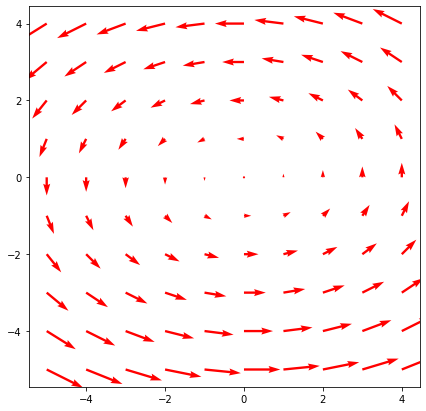

In [7]:
plot_vector_field(f,-5,5,-5,5)

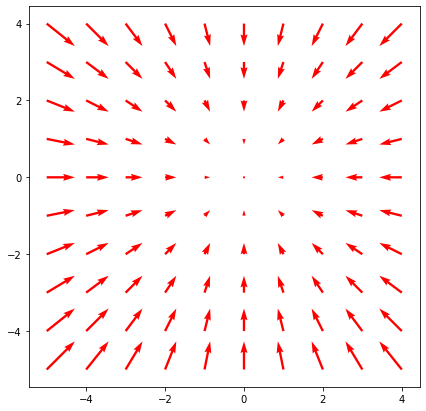

In [8]:
def f(x,y):
    return (-x,-y)

plot_vector_field(f,-5,5,-5,5)

In [9]:
f(3, 1)

(-3, -1)

In [10]:
f(-2, 3)

(2, -3)

In [12]:
from draw2d import *
from vectors import *

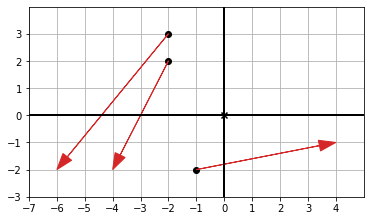

In [19]:
draw2d(Arrow2D(tail = (-2, 3), tip = f(-2, 3)), 
      Points2D((-2, 3)),
      Arrow2D(tail = (-1, -2), tip = f(-1, -2)), Points2D((-1, -2))
      ,Arrow2D(tail = (-2, 2), tip = f(-2, 2)), Points2D((-2, 2)))

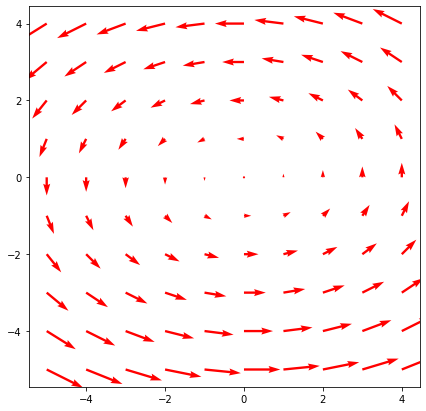

In [21]:
plot_vector_field(f, -5, 5, -5, 5)

In [22]:
def f(x, y):
    return (-2 - x, 4 - y)

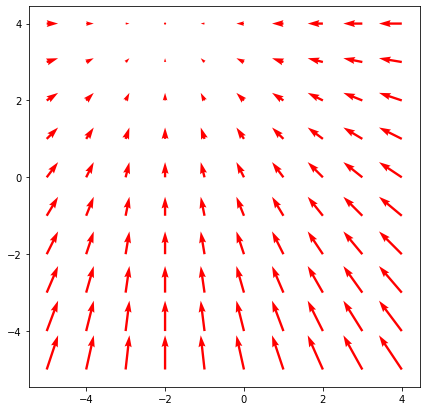

In [24]:
plot_vector_field(f, -5, 5, -5, 5)

In [25]:
def u(x,y):
    return 0.5 * (x**2 + y**2)

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def plot_scalar_field(f,xmin,xmax,ymin,ymax,xstep=0.25,ystep=0.25,c=None,cmap=cm.coolwarm,alpha=1,antialiased=False):
    fig = plt.figure()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection='3d')

    fv = np.vectorize(f)
    
    # Make data.
    X = np.arange(xmin, xmax, xstep)
    Y = np.arange(ymin, ymax, ystep)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X,Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,color=c,alpha=alpha,
                           linewidth=0, antialiased=antialiased)

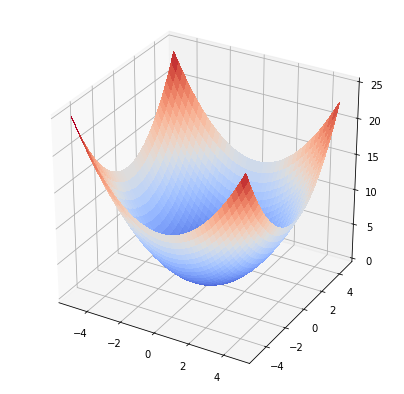

In [27]:
plot_scalar_field(u, -5, 5, -5, 5)

In [38]:
def f(x, y):
    return -u(x, y)

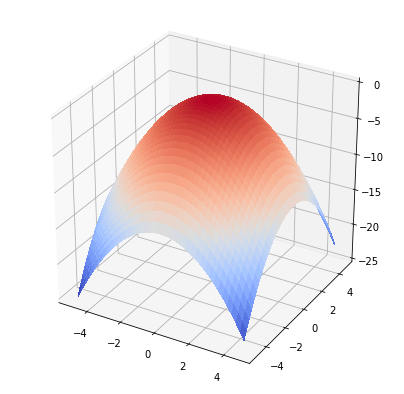

In [29]:
plot_scalar_field(f, -5, 5, -5, 5)

In [34]:
def f(x, y):
    return (x - y)**2

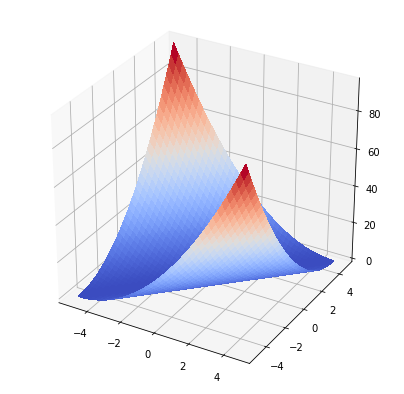

In [35]:
plot_scalar_field(f, -5, 5, -5, 5)

<Figure size 504x504 with 0 Axes>

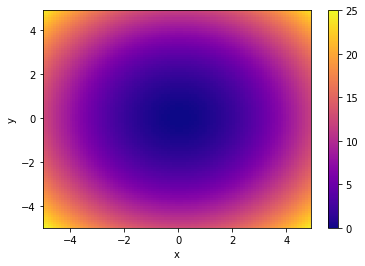

In [36]:
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xstep=0.1,ystep=0.1):
    fig = plt.figure()
    fig.set_size_inches(7,7)

    fv = np.vectorize(f)

    X = np.arange(xmin, xmax, xstep)
    Y = np.arange(ymin, ymax, ystep)
    X, Y = np.meshgrid(X, Y)
    
    # https://stackoverflow.com/a/54088910/1704140
    z = fv(X,Y)
    
#     # x and y are bounds, so z should be the value *inside* those bounds.
#     # Therefore, remove the last value from the z array.
#     z = z[:-1, :-1]
#     z_min, z_max = -z.min(), z.max()

    fig, ax = plt.subplots()

    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    # set the limits of the plot to the limits of the data
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)
    plt.xlabel('x')
    plt.ylabel('y')

scalar_field_heatmap(u,-5,5,-5,5)

<Figure size 504x504 with 0 Axes>

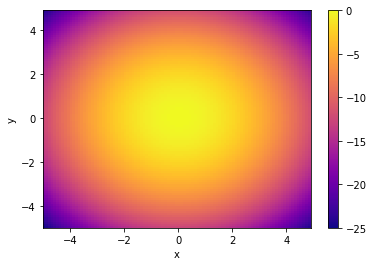

In [39]:
scalar_field_heatmap(f, -5, 5, -5, 5)

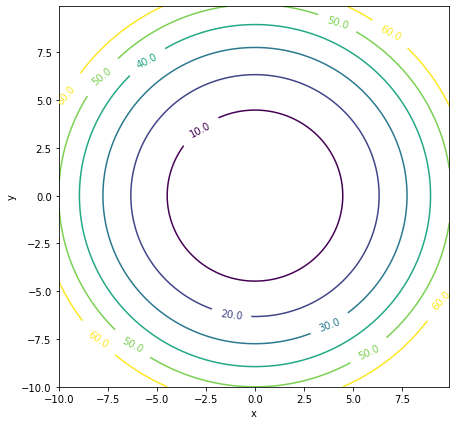

In [40]:
def scalar_field_contour(f,xmin,xmax,ymin,ymax,levels=None):

    fv = np.vectorize(f)

    X = np.arange(xmin, xmax, 0.1)
    Y = np.arange(ymin, ymax, 0.1)
    X, Y = np.meshgrid(X, Y)
    
    # https://stackoverflow.com/a/54088910/1704140
    Z = fv(X,Y)
    
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z,levels=levels)
    ax.clabel(CS, inline=1, fontsize=10,fmt='%1.1f')
    plt.xlabel('x')
    plt.ylabel('y')
    fig.set_size_inches(7,7)
    
scalar_field_contour(u,-10,10,-10,10,levels=[10,20,30,40,50,60])

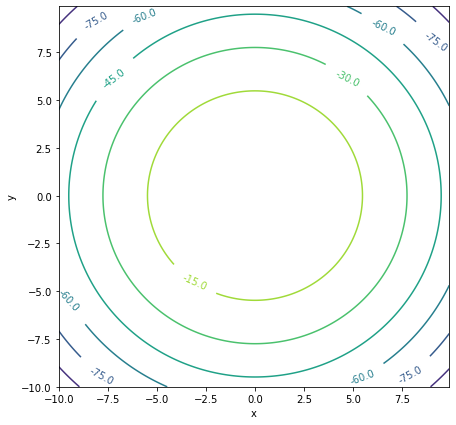

In [43]:
scalar_field_contour(f, -10,10,-10,10)

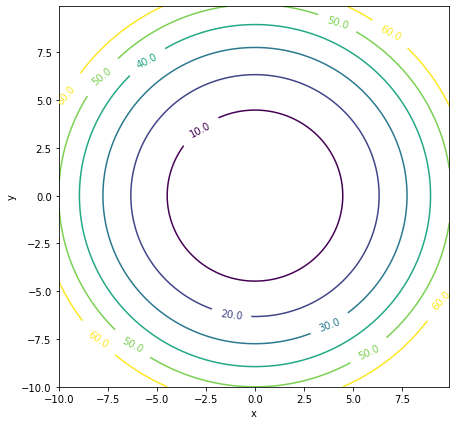

In [44]:
scalar_field_contour(u, -10, 10, -10, 10, [10, 20, 30, 40, 50, 60])

In [45]:
def plot_function(f,xmin,xmax,color=None):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],c=color)

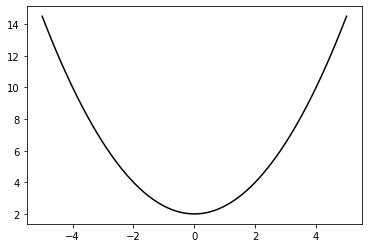

In [47]:
plot_function(lambda x : u(x, 2), -5, 5, color = 'black')

In [97]:
from sympy import *
from sympy.core.core import *

In [98]:
x = Symbol('x')
y = Symbol('y')

u_xy = 0.5 * (x**2 + y**2)

In [99]:
u_x1 = u_xy.subs(y, 1)

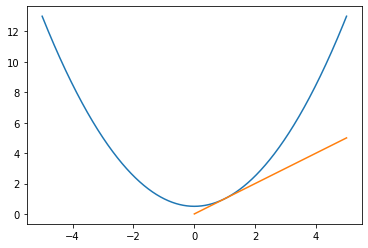

In [106]:
plot_function(lambda x0 : u_x1.subs(x, x0), -5, 5)
plot_function(lambda x0 : u_x1.diff(x).subs(x, x0), 0, 5)

In [115]:
U = u_xy.subs(x, -5)

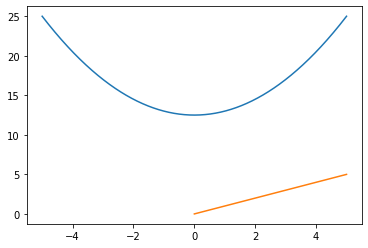

In [117]:
plot_function(lambda x0 : U.subs(y, x0), -5, 5)
plot_function(lambda x0 : U.diff(y).subs(y, x0), 0, 5)

In [150]:
def V(x, y):
    return 1 + y**2 + (-2*x**2) + x**6

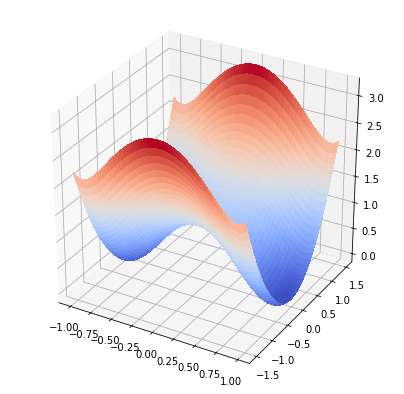

In [163]:
plot_scalar_field(V, xmin = -1, xmax = 1, ymin = -1.5, ymax = 1.5, xstep = .01, ystep = .01)

In [170]:
neg_v_grad = lambda x, y : (4 * x - 6*x ** 5, -2 * y)

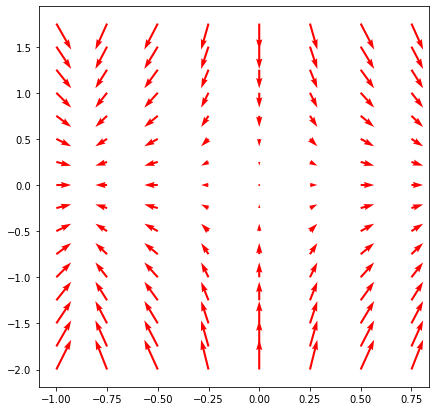

In [174]:
plot_vector_field(neg_v_grad, -1, 1, -2, 2, xstep = 0.25, ystep = 0.25)

In [184]:
f = (e**y) * sin(x)

In [199]:
h = f.subs(y, 1)

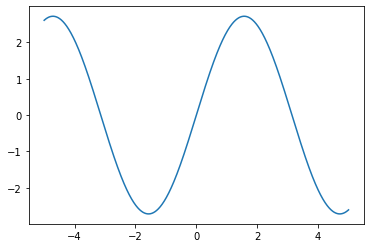

In [200]:
plot_function(lambda xi : h.subs(x, xi), -5, 5)

In [205]:
h = f.subs(x, math.pi / 6)

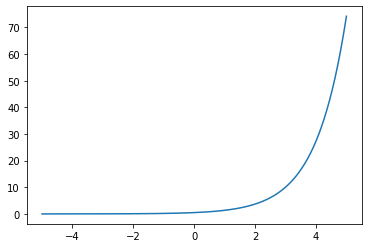

In [206]:
plot_function(lambda yi : h.subs(y, yi), -5, 5)

In [207]:
h.diff(y)

0.5*2.71828182845905**y

In [208]:
f

2.71828182845905**y*sin(x)

In [209]:
neg_grad = (-f.diff(x), -f.diff(y))

In [215]:
(neg_grad[0].subs(x, pi/6).subs(y, 1), neg_grad[1].subs(x, pi/6).subs(y, 1))

(-1.35914091422952*sqrt(3), -1.35914091422952)

In [220]:
u = np.matrix((-5, 2)).T
v = np.matrix((2, 5)).T

In [222]:
u.T @ v

matrix([[0]])